### Import libraries

In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob

#### Fetch data

In [27]:
# Define the folder path where your files are stored
folder_path = "/Users/bobbi/Careerfoundry/Shipping_project/02 Data/Original Data/"

# Use glob to list all CSV files
import_files = glob.glob(os.path.join(folder_path, "port_calls_import_*.csv"))
export_files = glob.glob(os.path.join(folder_path, "port_calls_export_*.csv"))

# Create dictionaries to store the dataframes dynamically
port_calls_import = {}
port_calls_export = {}

# Function to read CSV with automatic encoding detection
def read_csv_safely(file_path):
    try:
        return pd.read_csv(file_path, index_col=False, encoding="utf-8")
    except UnicodeDecodeError:
        return pd.read_csv(file_path, index_col=False, encoding="latin-1")  # Alternative encoding

# Import Import Files
for file in import_files:
    year = file.split("_")[-1].split(".")[0]  # Extract year from filename
    port_calls_import[year] = read_csv_safely(file)
    print(f"Loaded Import Data for {year}")

# Import Export Files
for file in export_files:
    year = file.split("_")[-1].split(".")[0]  # Extract year from filename
    port_calls_export[year] = read_csv_safely(file)
    print(f"Loaded Export Data for {year}")

# Combine all years into a single DataFrame (optional)
df_imports = pd.concat(port_calls_import.values(), ignore_index=True)
df_exports = pd.concat(port_calls_export.values(), ignore_index=True)

print("All port calls import/export data loaded successfully!")


Loaded Import Data for 2020
Loaded Import Data for 2021
Loaded Import Data for 2023
Loaded Import Data for 2022
Loaded Import Data for 2019
Loaded Import Data for 2024
Loaded Import Data for 2018
Loaded Import Data for 2015
Loaded Import Data for 2016
Loaded Import Data for 2017
Loaded Export Data for 2015
Loaded Export Data for 2016
Loaded Export Data for 2017
Loaded Export Data for 2020
Loaded Export Data for 2021
Loaded Export Data for 2023
Loaded Export Data for 2022
Loaded Export Data for 2019
Loaded Export Data for 2024
Loaded Export Data for 2018
All port calls import/export data loaded successfully!


In [28]:
df_imports.head()

,typeCode,freqCode,countryareaCode,countryareaDesc,vesselTypeCode,vesselTypeDesc,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
0,C,D,470,Malta,7,Foodstuff,M,Imports,2020-11-23T00:00:00,0,0.0,0,0.267,7.613,904.633
1,C,D,470,Malta,7,Foodstuff,M,Imports,2020-11-24T00:00:00,0,0.0,0,0.267,7.613,904.633
2,C,D,470,Malta,7,Foodstuff,M,Imports,2020-11-25T00:00:00,0,0.0,0,0.267,7.613,904.633
3,C,D,470,Malta,7,Foodstuff,M,Imports,2020-11-26T00:00:00,0,0.0,0,0.267,7.613,904.633
4,C,D,470,Malta,7,Foodstuff,M,Imports,2020-11-27T00:00:00,0,0.0,0,0.267,7.613,904.633


In [29]:
df_imports['countryareaDesc'].unique()

array(['Malta', 'Mauritius', 'Maldives', 'Mexico', 'Malaysia',
       'Mozambique', 'Namibia', 'New Caledonia', 'Nigeria', 'Nicaragua',
       'Netherlands', 'Norway', 'Nauru', 'New Zealand', 'Oman', 'Peru',
       'French Polynesia', 'Papua New Guinea', 'Philippines', 'Pakistan',
       'Poland', 'Portugal', 'Palau', 'Paraguay', 'Qatar', 'Romania',
       'Russian Federation', 'Saudi Arabia', 'Solomon Isds', 'Seychelles',
       'Sudan', 'Sweden', 'Singapore', 'Saint Helena', 'Slovenia',
       'Sierra Leone', 'Senegal', 'Somalia', 'Suriname', 'El Salvador',
       'Saint Maarten', 'Syria', 'Turks and Caicos Isds', 'Togo',
       'Thailand', 'Timor-Leste', 'Turkmenistan', 'Tunisia', 'Tonga',
       'Türkiye', 'South Africa', 'Africa', 'United Arab Emirates',
       'Antigua and Barbuda', 'Albania', 'Angola', 'Argentina',
       'American Samoa', 'Australia', 'Aruba', 'Azerbaijan', 'Barbados',
       'Trinidad and Tobago', 'Tuvalu', 'Taiwan, Province of China',
       'United Rep. of T

In [30]:
df_exports.head()

,typeCode,freqCode,countryareaCode,countryareaDesc,vesselTypeCode,vesselTypeDesc,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
0,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-06T00:00:00,0,0.0,0,0.133,0.0,903.4
1,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-07T00:00:00,0,0.0,0,0.133,0.0,903.4
2,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-08T00:00:00,0,0.0,0,0.133,0.0,903.4
3,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-09T00:00:00,0,0.0,0,0.133,0.0,903.4
4,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-10T00:00:00,0,0.0,0,0.133,0.0,903.4


In [31]:
df_exports['countryareaDesc'].unique()

array(['Cayman Isds', 'Kazakhstan', 'Lebanon', 'Saint Lucia', 'Sri Lanka',
       'Liberia', 'Lithuania', 'Morocco', 'Montenegro', 'Madagascar',
       'Marshall Isds', 'Myanmar', 'China, Macao SAR', 'N. Mariana Isds',
       'Mauritania', 'Malta', 'Mauritius', 'Maldives', 'Mexico',
       'Malaysia', 'Mozambique', 'Namibia', 'New Caledonia', 'Nigeria',
       'Nicaragua', 'Netherlands', 'Norway', 'Nauru', 'New Zealand',
       'Oman', 'Peru', 'French Polynesia', 'Papua New Guinea',
       'Philippines', 'Pakistan', 'Poland', 'Portugal', 'Palau',
       'Paraguay', 'Qatar', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'Solomon Isds', 'Seychelles', 'Sudan', 'Sweden',
       'Singapore', 'Slovenia', 'Sierra Leone', 'Senegal', 'Somalia',
       'United Arab Emirates', 'Suriname', 'El Salvador', 'Saint Maarten',
       'Syria', 'Turks and Caicos Isds', 'Togo', 'Thailand',
       'Timor-Leste', 'Turkmenistan', 'Tunisia', 'Tonga', 'Türkiye',
       'Trinidad and Tobago', 'Tuvalu',

In [32]:
print(type(df_exports))  

<class 'pandas.core.frame.DataFrame'>


In [33]:
world_ports = pd.concat((df_exports, df_imports), ignore_index=True)

In [34]:
world_ports.head()

,typeCode,freqCode,countryareaCode,countryareaDesc,vesselTypeCode,vesselTypeDesc,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
0,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-06T00:00:00,0,0.0,0,0.133,0.0,903.4
1,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-07T00:00:00,0,0.0,0,0.133,0.0,903.4
2,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-08T00:00:00,0,0.0,0,0.133,0.0,903.4
3,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-09T00:00:00,0,0.0,0,0.133,0.0,903.4
4,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-10T00:00:00,0,0.0,0,0.133,0.0,903.4


In [35]:
world_ports.tail()

,typeCode,freqCode,countryareaCode,countryareaDesc,vesselTypeCode,vesselTypeDesc,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
1999995,C,D,484,Mexico,6,LPG/LNG,M,Imports,2017-09-29T00:00:00,0,0.00,0,0.700,6286.547,20613.300
1999996,C,D,484,Mexico,6,LPG/LNG,M,Imports,2017-09-30T00:00:00,1,2118.12,4380,0.733,6357.151,20759.300
1999997,C,D,484,Mexico,6,LPG/LNG,M,Imports,2017-10-01T00:00:00,0,0.00,0,0.733,6357.151,20759.300
1999998,C,D,484,Mexico,6,LPG/LNG,M,Imports,2017-10-02T00:00:00,2,8186.03,24244,0.800,6630.019,21567.433
1999999,C,D,484,Mexico,6,LPG/LNG,M,Imports,2017-10-03T00:00:00,1,13003.20,93796,0.833,7063.460,24693.967


#### Check for missing values

In [36]:
missing_values = world_ports.isnull().sum()
print(missing_values)

typeCode           0
freqCode           0
countryareaCode    0
countryareaDesc    0
vesselTypeCode     0
vesselTypeDesc     0
flowCode           0
flowDesc           0
date               0
num_pc             0
mtc                0
dwt                0
num_pc_ma          0
mtc_ma             0
dwt_ma             0
dtype: int64


#### Handle duplicates

In [37]:
duplicates = world_ports.duplicated().sum()
print(f"NUmber of duplicate rows:{duplicates}")

NUmber of duplicate rows:0


There are no duplicates

In [39]:
world_ports['date'] = pd.to_datetime(world_ports['date'], errors='coerce').dt.normalize()
world_ports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   typeCode         object        
 1   freqCode         object        
 2   countryareaCode  int64         
 3   countryareaDesc  object        
 4   vesselTypeCode   int64         
 5   vesselTypeDesc   object        
 6   flowCode         object        
 7   flowDesc         object        
 8   date             datetime64[ns]
 9   num_pc           int64         
 10  mtc              float64       
 11  dwt              int64         
 12  num_pc_ma        float64       
 13  mtc_ma           float64       
 14  dwt_ma           float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 228.9+ MB


In [40]:
world_ports.head()

,typeCode,freqCode,countryareaCode,countryareaDesc,vesselTypeCode,vesselTypeDesc,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
0,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-06,0,0.0,0,0.133,0.0,903.4
1,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-07,0,0.0,0,0.133,0.0,903.4
2,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-08,0,0.0,0,0.133,0.0,903.4
3,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-09,0,0.0,0,0.133,0.0,903.4
4,C,D,136,Cayman Isds,0,Total,X,Exports,2015-05-10,0,0.0,0,0.133,0.0,903.4


Some of the columns are not needed for any further analysis so they will be dropped and 'countryareaDesc' and 'vesselTypeDesc' will be renamed too.

In [41]:
world_ports.rename(columns={"countryareaDesc": "country"}, inplace=True)

world_ports.rename(columns={"vesselTypeDesc": "vessel_type"}, inplace=True)

world_ports.drop(columns= ['typeCode', 'freqCode'], inplace=True)

In [42]:
world_ports.head()

,countryareaCode,country,vesselTypeCode,vessel_type,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
0,136,Cayman Isds,0,Total,X,Exports,2015-05-06,0,0.0,0,0.133,0.0,903.4
1,136,Cayman Isds,0,Total,X,Exports,2015-05-07,0,0.0,0,0.133,0.0,903.4
2,136,Cayman Isds,0,Total,X,Exports,2015-05-08,0,0.0,0,0.133,0.0,903.4
3,136,Cayman Isds,0,Total,X,Exports,2015-05-09,0,0.0,0,0.133,0.0,903.4
4,136,Cayman Isds,0,Total,X,Exports,2015-05-10,0,0.0,0,0.133,0.0,903.4


In [43]:
world_ports.describe()

,countryareaCode,vesselTypeCode,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
count,2.000000e+06,2.000000e+06,2000000,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,5.134831e+02,2.895443e+00,2020-01-01 22:38:33.820800,7.924253e+00,7.828530e+04,1.999642e+05,7.926331e+00,7.842838e+04,2.003440e+05
min,0.000000e+00,0.000000e+00,2015-04-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e-02,0.000000e+00,4.167000e+00
25%,1.740000e+02,1.000000e+00,2017-07-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.330000e-01,1.335730e+02,1.657900e+03
50%,3.400000e+02,2.000000e+00,2019-12-31 12:00:00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,1.599299e+03,9.672800e+03
75%,6.430000e+02,5.000000e+00,2022-07-02 00:00:00,2.000000e+00,1.129009e+04,5.595725e+04,2.533000e+00,1.512364e+04,6.044651e+04
max,9.030000e+03,7.000000e+00,2024-12-02 00:00:00,2.279700e+04,3.477852e+07,5.733330e+07,2.279700e+04,2.274247e+07,5.286154e+07
std,1.066267e+03,2.325873e+00,NaN,6.710231e+01,6.817077e+05,1.512522e+06,6.713611e+01,6.757469e+05,1.505857e+06


### Key Observations

Time Range
* The date column ranges from 2015-04-01 to 2024-12-2. This suggests that the dataset contains log-term trends over 9 years approximately.

Trade volume (mtc, dwt, num_pc)
* The mean metric tons carried (mtc) is  78.285 million tons but the standard deviation is 68.17 million tons, which suggests significant variance in shipping loads.
* The deadweight tonnage (dwt) also has a high variance, with a mean of 199,964 but a max of nearly 60 million.
* The number of port calls (num_pc) has a median of 0, with an upper quartile(Q3) of 2, which indicates that most observations have few or no port calls, but there are extreme cases with a maximum of 3,696 port calls.

Distribution and outliers
* Minimum values of 0 for many key numerical variables (e.g., num_pc, mtc, dwt), suggesting there might be rows where no trade was recorded.
* Maximum values with extreme outliers exist in metric tons carried (mtc) and deadweight (dwt), meaning that some large-scale shipments dominate the dataset.

Vessel types (vesselTypeCode). The dataset includes different vessel types (from 1 to 7), but the average is around 3, meaning mid-range vessel sizes might be the most common.

Countries involved (countryareaCode). The country code ranges from 0 to 9030, meaning there might be inconsistencies in coding (e.g., 0 as a missing or placeholder value).

In [45]:
# Count occurrences of countryareaCode = 0
zero_country_count = world_ports[world_ports["countryareaCode"] == 0].shape[0]

print(zero_country_count)

12499


In [46]:
print(world_ports[world_ports["countryareaCode"] == 0])

         countryareaCode country  vesselTypeCode vessel_type flowCode  \
70671                  0   World               0       Total        X   
70672                  0   World               0       Total        X   
70673                  0   World               0       Total        X   
70674                  0   World               0       Total        X   
70675                  0   World               0       Total        X   
...                  ...     ...             ...         ...      ...   
1788966                0   World               7   Foodstuff        M   
1788967                0   World               7   Foodstuff        M   
1788968                0   World               7   Foodstuff        M   
1788969                0   World               7   Foodstuff        M   
1788970                0   World               7   Foodstuff        M   

        flowDesc       date  num_pc           mtc       dwt  num_pc_ma  \
70671    Exports 2015-04-01    1583  1.900473e+07

The country code 0 is used for World imports and exports. Nothing will be done for now to this code

In [47]:
print(world_ports[world_ports["countryareaCode"] == 9030])

         countryareaCode country  vesselTypeCode vessel_type flowCode  \
1100417             9030  Africa               0       Total        M   
1100418             9030  Africa               0       Total        M   
1100419             9030  Africa               0       Total        M   
1100420             9030  Africa               0       Total        M   
1100421             9030  Africa               0       Total        M   
...                  ...     ...             ...         ...      ...   
1802557             9030  Africa               7   Foodstuff        M   
1802558             9030  Africa               7   Foodstuff        M   
1802559             9030  Africa               7   Foodstuff        M   
1802560             9030  Africa               7   Foodstuff        M   
1802561             9030  Africa               7   Foodstuff        M   

        flowDesc       date  num_pc       mtc      dwt  num_pc_ma    mtc_ma  \
1100417  Imports 2021-01-01      92     0.00

In UN Comtrade and certain UN M49 classifications, the code 9030 is used as a regional aggregation for Africa. This means that trade data associated with countryareaCode = 9030 refers to aggregated statistics for the entire African continent, rather than a specific country.

##### Addressing zero values and comparing with moving averages

In [49]:
# Handling missing values in specific columns
world_ports[['mtc', 'dwt', 'num_pc']].isnull().sum()

mtc       0
dwt       0
num_pc    0
dtype: int64

In this section, we analyze the presence of zero values in key columns such as mtc (metric tons carried), dwt (deadweight tonnage), and num_pc (number of port calls). Zero values can represent legitimate operational scenarios (e.g., empty voyages) or potential data entry errors. We also compare these zero values with their moving averages to understand how smoothing affects the data. Since there are no missing values in mtc, dwt, and num_pc, but there are occurrences of 0, it's essential to determine whether these zero values are:
- Legitimate data points – For example, certain dates or vessel types may have no cargo or port calls, which is valid.
- Potential data entry errors – If we suspect that some zero values should actually be missing values, further investigation is needed.

Since we are dealing with cargo shipments (measured in metric tons and deadweight tonnage), the presence of zeros is not necessarily an error. Since ships don’t carry cargo all the time, zero values might represent empty journeys or unused vessel capacity, like ship arriving at a port without cargo (mtc = 0) but leaving with full capacity.

In [50]:
ports_active = world_ports[(world_ports['mtc'] > 0) & (world_ports['dwt'] > 0)]

In [51]:
ports_active.shape

(796485, 13)

In [52]:
# Count of empty vessels
zero_counts = (world_ports[['mtc', 'dwt', 'num_pc']] == 0).sum()
print(zero_counts)

mtc       1203515
dwt       1078327
num_pc    1078327
dtype: int64


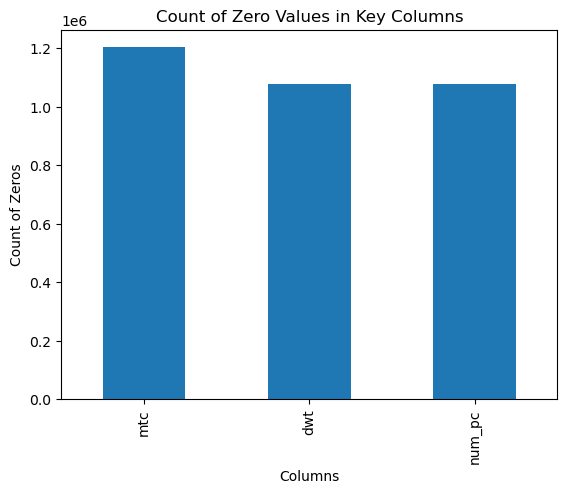

In [54]:
zero_counts.plot(kind='bar')
plt.title('Count of Zero Values in Key Columns')
plt.xlabel('Columns')
plt.ylabel('Count of Zeros')
plt.show()

In [55]:
# Count of empty vessels
zero_counts_ma = (world_ports[['mtc_ma', 'dwt_ma', 'num_pc_ma']] == 0).sum()
print(zero_counts_ma)

mtc_ma       212497
dwt_ma            0
num_pc_ma         0
dtype: int64


Original Data:
* The original columns (mtc, dwt, num_pc) contain a significant number of zero values, especially in mtc (1,203,515 zeros).
* This suggests that many vessels may have periods of no cargo activity or no port calls.

Moving Averages:
* The moving averages (mtc_ma, dwt_ma, num_pc_ma) show a reduction in zero values, particularly in dwt_ma and num_pc_ma, which have no zeros.
* The smoothing effect of moving averages reduces the impact of isolated zero values, providing a more consistent representation of the data.


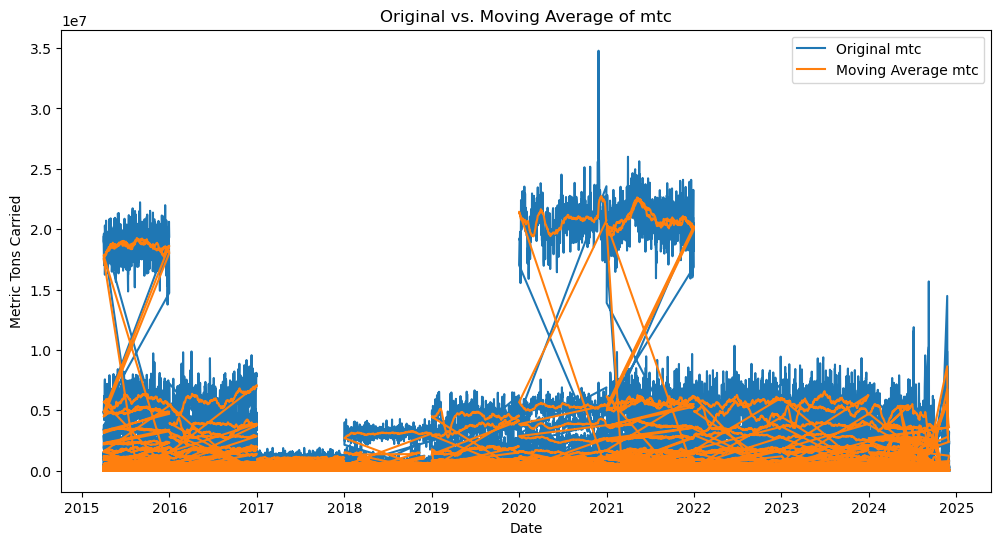

In [56]:
# Compare original data and moving average

plt.figure(figsize=(12, 6))
plt.plot(world_ports['date'], world_ports['mtc'], label='Original mtc')
plt.plot(world_ports['date'], world_ports['mtc_ma'], label='Moving Average mtc')
plt.title('Original vs. Moving Average of mtc')
plt.xlabel('Date')
plt.ylabel('Metric Tons Carried')
plt.legend()
plt.show()

As we can see in the image moving averages have a smoothing effect as they calculate the mean over a specified window, which reduces the impact of isolated zeros. For example if a vessel has mtc = 0 for one day but non-zero values before and after, the moving average will likely result in a non-zero value.

They also can fill gaps where zero values might represent missing or incomplete data, providing a more continuous trend. Therefore we can use the moving average for trend analysis

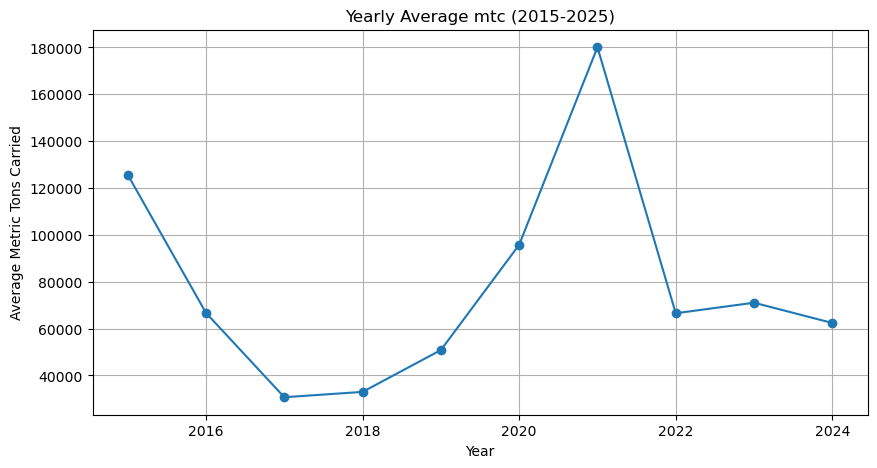

In [57]:
# Calculate yearly average mtc
world_ports['year'] = world_ports['date'].dt.year
yearly_avg = world_ports.groupby('year')['mtc'].mean()

# Plot yearly trends
plt.figure(figsize=(10, 5))
yearly_avg.plot(kind='line', marker='o')
plt.title('Yearly Average mtc (2015-2025)')
plt.xlabel('Year')
plt.ylabel('Average Metric Tons Carried')
plt.grid()
plt.show()

Zero values in the dataset can represent legitimate operational scenarios or potential data errors. By comparing the original data with moving averages, we observe a significant reduction in zero values due to the smoothing effect. Moving averages are useful for trend analysis but should be used alongside the original data to ensure a comprehensive understanding of cargo activity. Further investigation into zero values is recommended to validate their legitimacy and improve data quality.

In [58]:
# Filter rows where dwt > 0 but mtc = 0
legitimate_zeros = world_ports[(world_ports['dwt'] > 0) & (world_ports['mtc'] == 0)]

# Display the number of such rows
print(f"Number of rows where dwt > 0 but mtc = 0: {len(legitimate_zeros)}")

# Display a sample of these rows
print("\nSample of rows where dwt > 0 but mtc = 0:")
print(legitimate_zeros[['date', 'dwt', 'mtc']].head())

Number of rows where dwt > 0 but mtc = 0: 125188

Sample of rows where dwt > 0 but mtc = 0:
         date    dwt  mtc
10 2015-05-16   7748  0.0
38 2015-06-13   7748  0.0
53 2015-06-28   5399  0.0
80 2015-07-25   7748  0.0
89 2015-08-03  42854  0.0


In [59]:
# Total number of rows in the dataset
total_rows = len(world_ports)

# Number of rows where dwt > 0 but mtc = 0
legitimate_zeros = world_ports[(world_ports['dwt'] > 0) & (world_ports['mtc'] == 0)]
legitimate_zero_count = len(legitimate_zeros)

# Calculate the proportion
proportion = (legitimate_zero_count / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Rows where dwt > 0 but mtc = 0: {legitimate_zero_count}")
print(f"Proportion of such rows: {proportion:.2f}%")

Total rows: 2000000
Rows where dwt > 0 but mtc = 0: 125188
Proportion of such rows: 6.26%


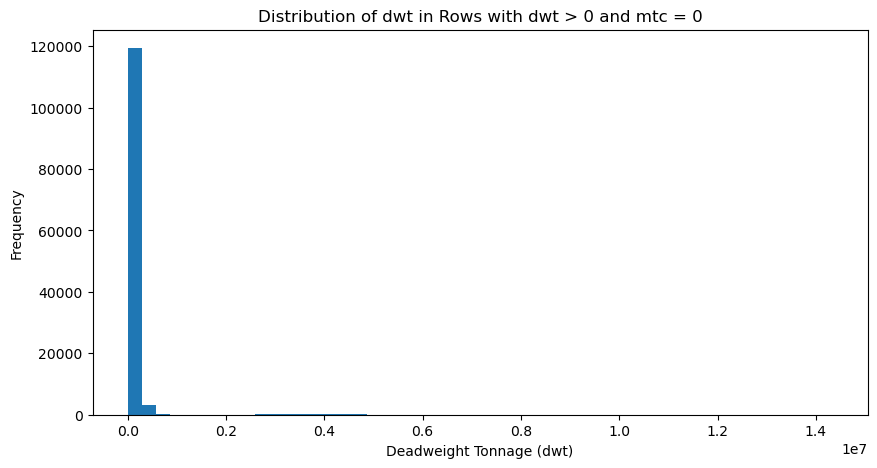

In [60]:
plt.figure(figsize=(10, 5))
plt.hist(legitimate_zeros['dwt'], bins=50)
plt.title('Distribution of dwt in Rows with dwt > 0 and mtc = 0')
plt.xlabel('Deadweight Tonnage (dwt)')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Group by year and count legitimate zeros
legitimate_zeros['year'] = legitimate_zeros['date'].dt.year
yearly_counts = legitimate_zeros.groupby('year').size()
print(yearly_counts)

year
2015    12416
2016    10554
2017    11691
2018    11174
2019    13963
2020    15090
2021    14365
2022    12222
2023    12568
2024    11145
dtype: int64


/var/folders/bs/25x482152nx68y1wp8l2g42c0000gn/T/ipykernel_5881/954144370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legitimate_zeros['year'] = legitimate_zeros['date'].dt.year


In [67]:
# Group by vessel type and count legitimate zeros
vessel_type_counts = legitimate_zeros.groupby('vessel_type').size()

print("\nCounts by vessel type:")
print(vessel_type_counts)


Counts by vessel type:
vessel_type
Bulk                        6264
Container/general cargo    15909
Foodstuff                   7336
LPG/LNG                     6679
Oil/chemicals               9146
Total                      63395
Vehicles                   16459
dtype: int64


Here we can see that there are some vessels with more zero rows than others. We can investigate this further as it seems to be a connection between both.

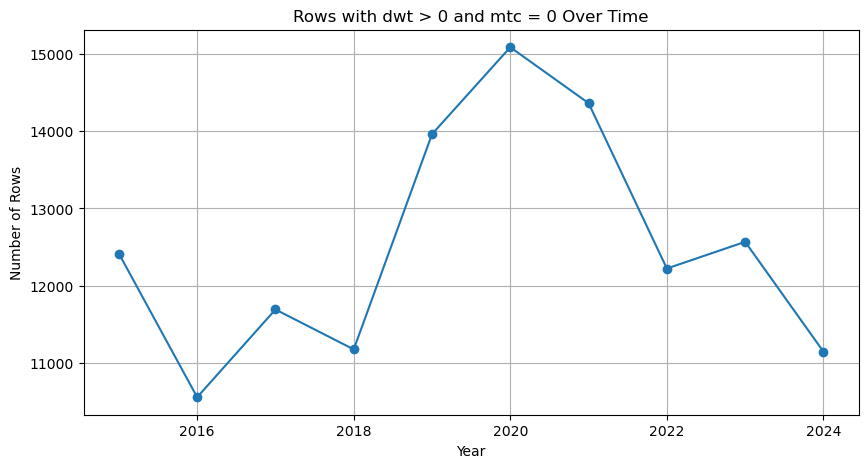

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
yearly_counts.plot(kind='line', marker='o')
plt.title('Rows with dwt > 0 and mtc = 0 Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.grid()
plt.show()

6% of the rows in your dataset have dwt > 0 but mtc = 0, this is a significant proportion and suggests that these zero values are likely legitimate rather than errors. A 6% proportion indicates that empty voyages (vessels with capacity but no cargo) are a common occurrence in your dataset.

This is consistent with real-world shipping operations, where vessels may travel empty due to:
* Repositioning: Moving to a new location for the next cargo.
* Maintenance: Returning to a home port for repairs or maintenance.
* Market Conditions: Lack of available cargo due to seasonal or economic factors.

The high proportion suggests that these zero values are not errors but rather valid data points reflecting actual operational scenarios. These rows should be retained in the dataset as they provide valuable insights into vessel utilization and operational patterns.

No further data cleaning or imputation is needed for these rows.

In [53]:
world_ports.to_pickle( '/Users/bobbi/Careerfoundry/Shipping_project/02 Data/Prepared Data/world_ports.pkl')